In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

df = pd.read_csv('../data/divvy_daily.csv')
df = df[['date', 'rides']]
df['date'] = pd.to_datetime(df['date'])
df.columns = ['ds', 'y']

/Users/oksjjj/coding/prophet/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [2]:
import numpy as np

def set_changepoints(df, n_changepoints, changepoint_range):
    """Set changepoints
    Sets changepoints to the dates of changepoints. Either:
    1) We are generating a grid of them.
    2) The user prefers no changepoints to be used.
    """
    df = df.sort_values('ds').reset_index(drop=True)
    # Place potential changepoints evenly through first
    # 'changepoint_range' proportion of the history
    hist_size = int(np.floor(df.shape[0] * changepoint_range))
    if n_changepoints + 1 > hist_size:
        n_changepoints = hist_size - 1
        print('n_changepoints greater than the number of observations. Using {}'.format(n_changepoints))
    if n_changepoints > 0:
        cp_indexes = np.linspace(0,
                                 hist_size - 1,
                                 n_changepoints+1).round().astype(np.int32)
        changepoints = df.iloc[cp_indexes]['ds'].tail(-1)
    else:
        changepoints = pd.Series(pd.to_datetime([]), name='ds')
    return changepoints

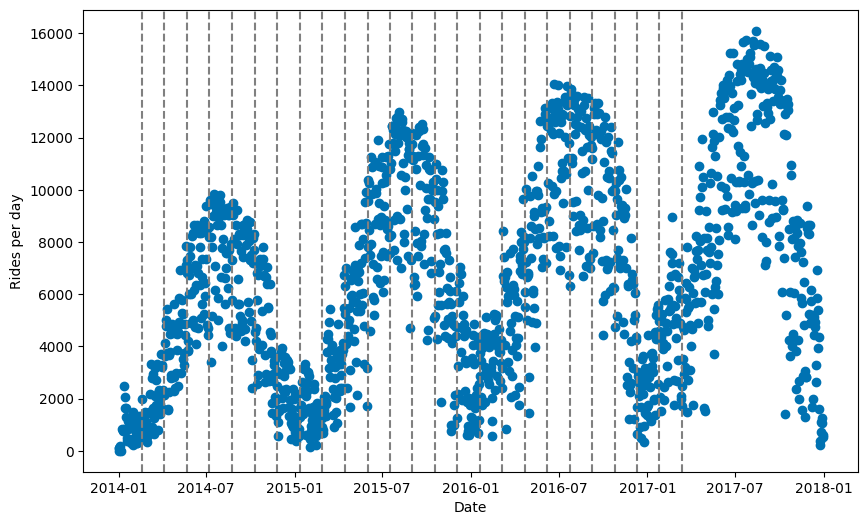

In [3]:
changepoints = set_changepoints(df, 25, 0.8)

plt.figure(figsize=[10, 6])
plt.scatter(df['ds'], df['y'], c='#0072B2')
for cp in changepoints:
    plt.axvline(x=cp, c='gray', ls='--')
plt.xlabel('Date')
plt.ylabel('Rides per day')
plt.show()

In [4]:
model = Prophet(seasonality_mode='multiplicative',
                yearly_seasonality=4)
model.fit(df)
forecast = model.predict()

07:22:04 - cmdstanpy - INFO - Chain [1] start processing
07:22:05 - cmdstanpy - INFO - Chain [1] done processing


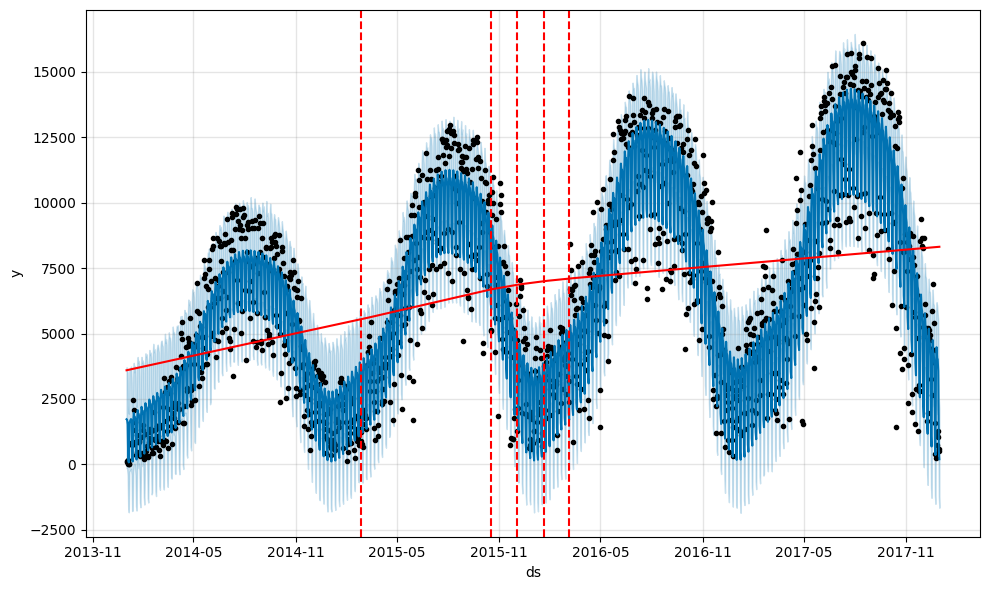

In [5]:
fig = model.plot(forecast)
add_changepoints_to_plot(fig.gca(), model, forecast)
plt.show()

In [6]:
print(model.params['delta'])

[[ 1.25449e-08 -4.58622e-05 -3.19205e-03 -3.97076e-03 -2.38087e-07
  -5.06062e-08  5.41855e-08  1.28224e-07  2.88416e-02  4.11968e-07
  -2.90385e-08 -2.28526e-08 -7.17005e-03 -9.43076e-02 -8.63045e-02
  -5.67350e-02 -3.56269e-02 -5.41394e-06 -6.84791e-08  2.67995e-09
   6.87095e-09  3.14736e-08 -8.79659e-08 -5.05811e-08 -4.09010e-08]]


In [7]:
ylims = fig.gca().get_ylim()

In [8]:
ylims

(np.float64(-2764.765257241893), np.float64(17368.78077781914))

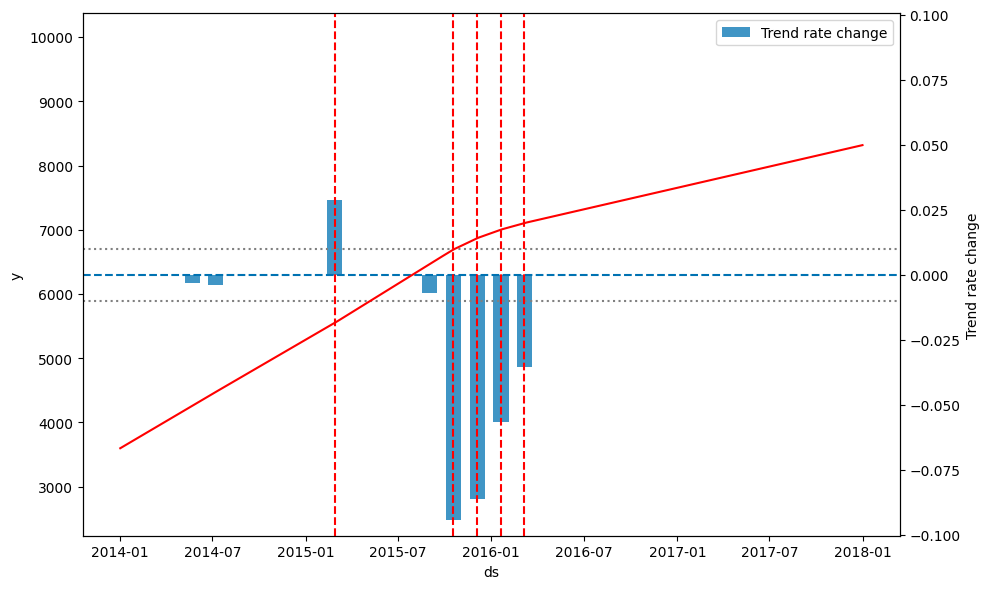

In [9]:
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'k'
add_changepoints_to_plot(ax1, model, forecast, trend=True)
ax1.set_xlabel('ds')
ax1.set_ylabel('y', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(ylims[0] + 5000, ylims[1] - 7000)
ax1.grid(False)

ax2 = ax1.twinx()

color = '#0072B2'
ax2.set_ylabel('Trend rate change')
ax2.bar(changepoints, model.params['delta'][0], width=30, color=color, alpha=.75, label='Trend rate change')
ax2.tick_params(axis='y', labelcolor='k')
ax2.axhline(y=0, c=color, ls='--')
ax2.axhline(y=.01, c='gray', ls=':')
ax2.axhline(y=-.01, c='gray', ls=':')
ax2.set_ylim(top=-ax2.get_ylim()[0], bottom=ax2.get_ylim()[0])

ax2.legend()

fig.tight_layout()
ax1.set_zorder(1)
ax1.patch.set_visible(False)
plt.show()

In [10]:
model = Prophet(seasonality_mode='multiplicative',
                yearly_seasonality=4,
                n_changepoints=5)

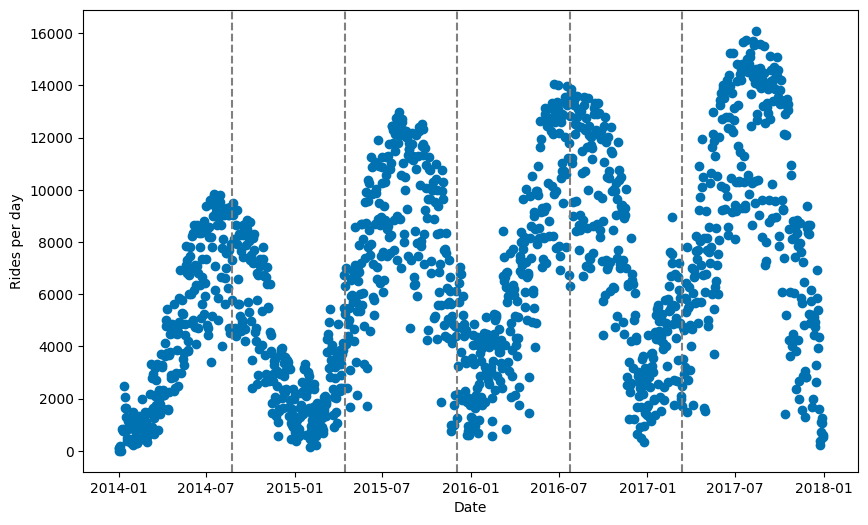

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(df['ds'], df['y'], c='#0072B2')
for cp in set_changepoints(df, 5, 0.8):
    plt.axvline(x=cp, c='gray', ls='--')
plt.xlabel('Date')
plt.ylabel('Rides per day')
plt.show()

In [12]:
model = Prophet(seasonality_mode='multiplicative',
                yearly_seasonality=4,
                changepoint_range=.5)

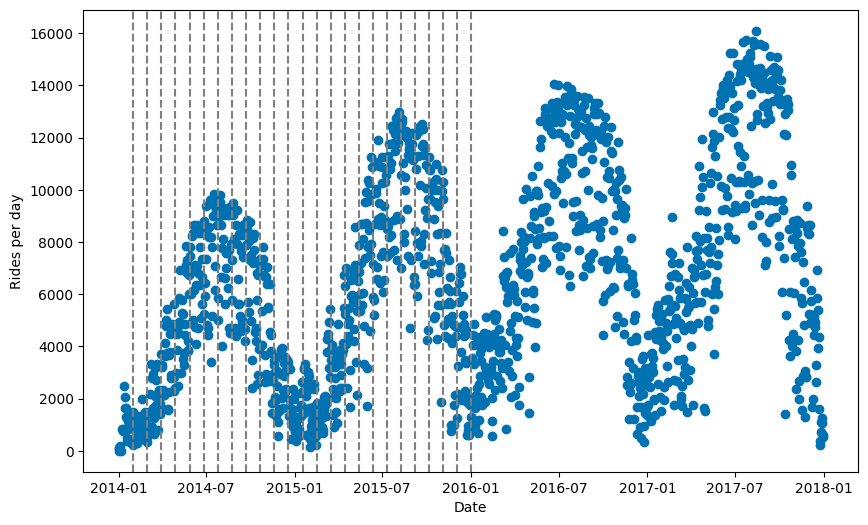

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(df['ds'], df['y'], c='#0072B2')
for cp in set_changepoints(df, 25, 0.5):
    plt.axvline(x=cp, c='gray', ls='--')
plt.xlabel('Date')
plt.ylabel('Rides per day')
plt.show()

07:22:05 - cmdstanpy - INFO - Chain [1] start processing
07:22:05 - cmdstanpy - INFO - Chain [1] done processing


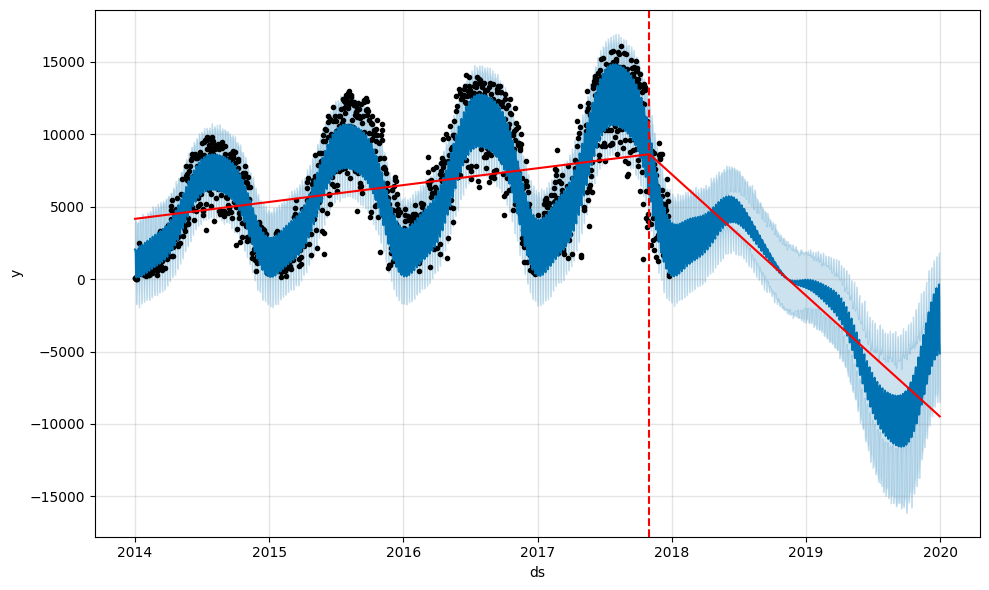

In [14]:
model = Prophet(seasonality_mode='multiplicative',
                yearly_seasonality=4,
                changepoints=['2017-11-01'],
                changepoint_prior_scale=50)
model.fit(df)
future = model.make_future_dataframe(periods=365*2)
forecast = model.predict(future)
fig = model.plot(forecast)
add_changepoints_to_plot(fig.gca(), model, forecast)
plt.show()

07:22:06 - cmdstanpy - INFO - Chain [1] start processing
07:22:06 - cmdstanpy - INFO - Chain [1] done processing


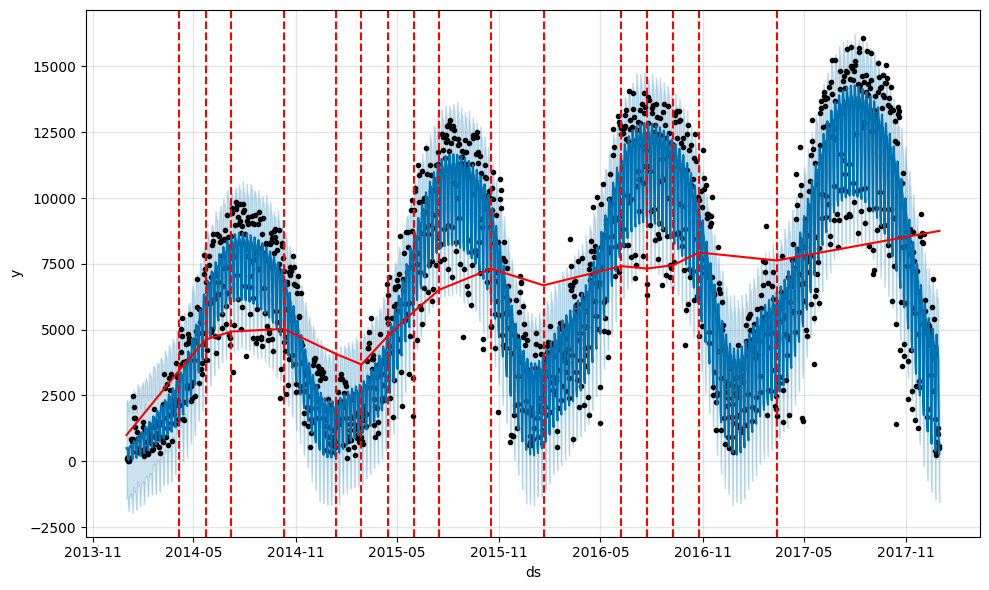

In [15]:
model = Prophet(seasonality_mode='multiplicative',
                yearly_seasonality=4,
                changepoint_prior_scale=1)
model.fit(df)
forecast = model.predict()
fig = model.plot(forecast)
add_changepoints_to_plot(fig.gca(), model, forecast)
plt.show()

07:22:06 - cmdstanpy - INFO - Chain [1] start processing
07:22:06 - cmdstanpy - INFO - Chain [1] done processing


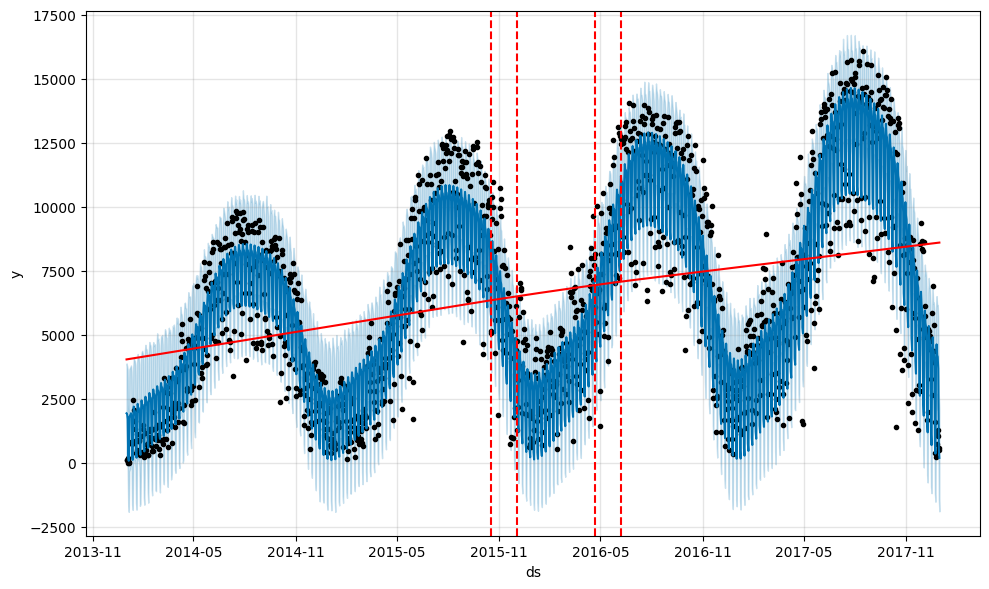

In [16]:
model = Prophet(seasonality_mode='multiplicative',
                yearly_seasonality=4,
                changepoint_prior_scale=.007)
model.fit(df)
forecast = model.predict()
fig = model.plot(forecast)
add_changepoints_to_plot(fig.gca(), model, forecast)
plt.show()

In [17]:
df = pd.read_csv('../data/instagram_jamesrodriguez10.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.columns = ['ds', 'y']

In [18]:
wc_2014 = pd.DataFrame({'holiday': 'World Cup 2014',
                        'ds': pd.to_datetime(['2014-06-12']),
                        'lower_window': 0,
                        'upper_window': 31})
wc_2018 = pd.DataFrame({'holiday': 'World Cup 2018',
                        'ds': pd.to_datetime(['2018-06-14']),
                        'lower_window': 0,
                        'upper_window': 31})
signing = pd.DataFrame({'holiday': 'Bayern Munich',
                        'ds': pd.to_datetime(['2017-07-11']),
                        'lower_window': 0,
                        'upper_window': 14})
special_events = pd.concat([wc_2014, wc_2018, signing])

In [19]:
changepoints = ['2014-06-12',
                '2014-07-13',
                '2017-07-11',
                '2017-07-31',
                '2018-06-14',
                '2018-07-15']

In [20]:
model = Prophet(seasonality_mode='multiplicative',
                holidays=special_events,
                yearly_seasonality=False,
                weekly_seasonality=False,
                changepoint_prior_scale=1,
                changepoints=changepoints)

07:22:06 - cmdstanpy - INFO - Chain [1] start processing
07:22:07 - cmdstanpy - INFO - Chain [1] done processing


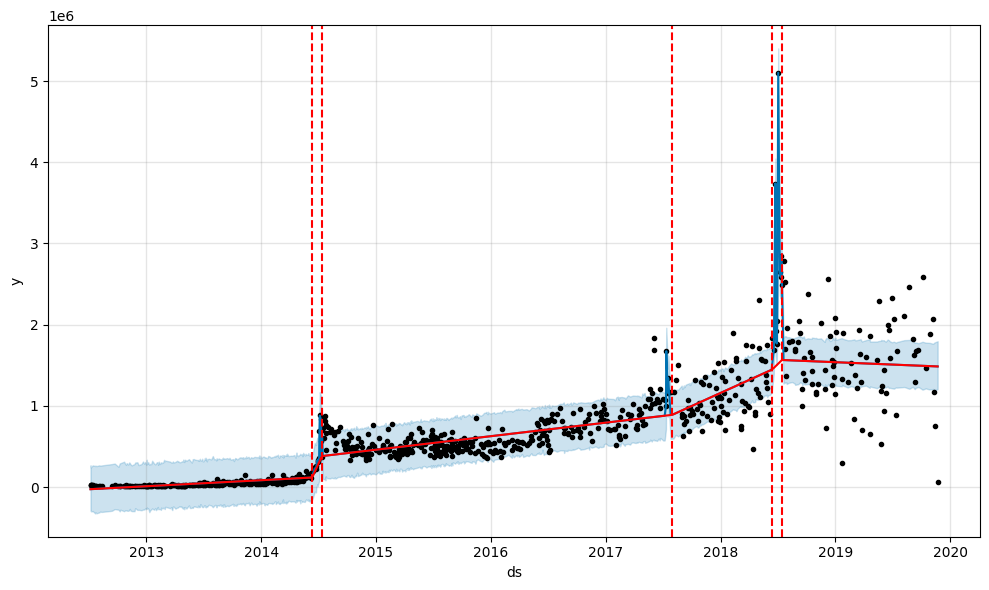

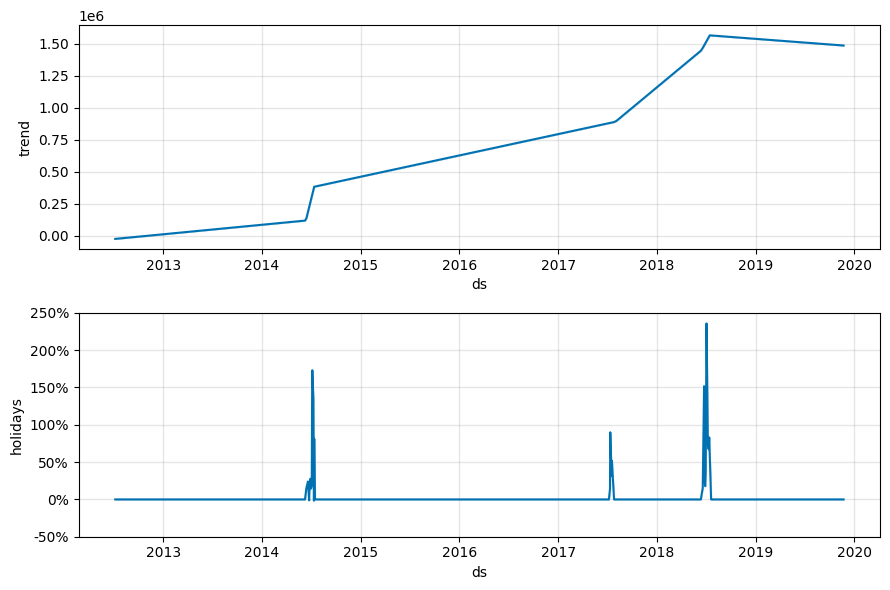

In [21]:
model.fit(df)
forecast = model.predict()
fig = model.plot(forecast)
add_changepoints_to_plot(fig.gca(), model, forecast)
plt.show()
fig2 = model.plot_components(forecast)
plt.show()

In [22]:
changepoints = set_changepoints(df, 5, 0.8)
new_changepoints = pd.Series(pd.to_datetime(['2014-05-02',
                                             '2014-08-25',
                                             '2017-07-31',
                                             '2018-06-14',
                                             '2018-06-04',
                                             '2018-07-03']))
changepoints = pd.concat([changepoints, new_changepoints])
changepoints = changepoints.sort_values().reset_index(drop=True)

07:22:07 - cmdstanpy - INFO - Chain [1] start processing
07:22:07 - cmdstanpy - INFO - Chain [1] done processing


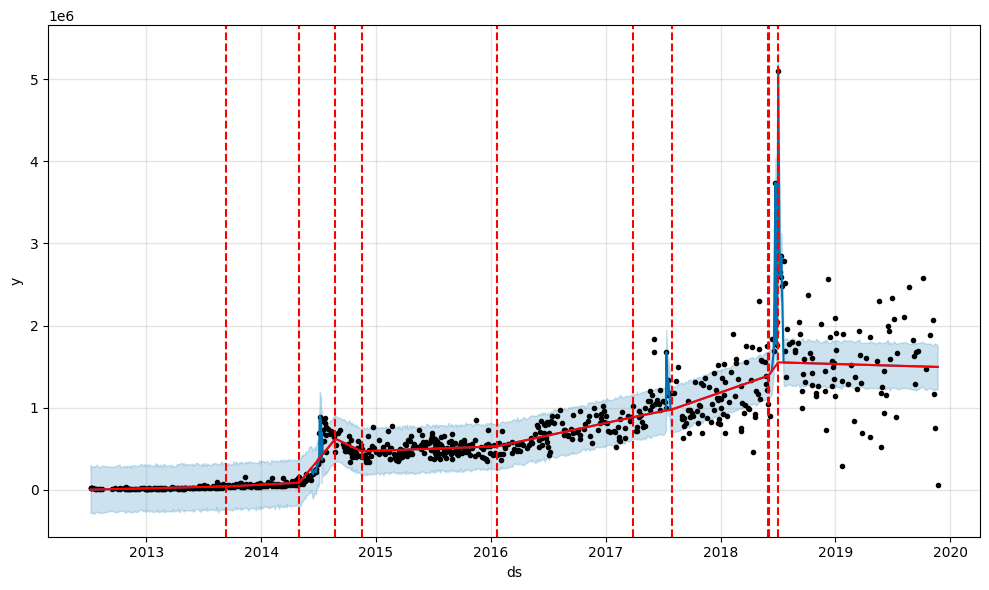

In [23]:
model = Prophet(seasonality_mode='multiplicative',
                holidays=special_events,
                yearly_seasonality=False,
                weekly_seasonality=False,
                changepoint_prior_scale=1,
                changepoints=changepoints)
model.fit(df)
forecast = model.predict()
fig = model.plot(forecast)
add_changepoints_to_plot(fig.gca(), model, forecast)
plt.show()